<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=89c58c952703cf1eab2186e25f3f3472607816487d6a08ab4102de58b57d4c77
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [53]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [54]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [55]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [56]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [57]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [58]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [59]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [60]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [61]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,210.157888,10.394272,779.447840,209.163694,9.017504,781.818802,0.489364
1,202.845903,0.000005,797.154092,202.845902,0.000003,797.154095,1.665620
2,209.643218,9.682957,780.673825,208.536991,8.143842,783.319167,0.595014
3,945.161665,27.138939,27.699396,941.707552,28.762445,29.530003,0.131020
4,983.677052,8.594381,7.728567,983.110303,8.872970,8.016727,0.065994
...,...,...,...,...,...,...,...
995,202.857378,0.016814,797.125808,202.853468,0.011087,797.135444,1.401368
996,202.869927,0.035195,797.094877,202.865506,0.028720,797.105773,0.684250
997,998.774760,1.112495,0.112745,998.740582,1.129562,0.129856,0.030526
998,202.902069,0.082265,797.015665,202.890209,0.064898,797.044894,0.798168


In [62]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [63]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,9.184137e-03,6.752753e-02,0.977788,7.936539e-03,5.858322e-02,0.980761,0.244065
1,4.315199e-09,3.269387e-08,1.000000,2.631026e-09,1.993043e-08,1.000000,0.834272
2,8.537692e-03,6.290640e-02,0.979326,7.149262e-03,5.290738e-02,0.982643,0.297077
3,9.323770e-01,1.763111e-01,0.034748,9.281727e-01,1.868584e-01,0.036975,0.064260
4,9.807538e-01,5.583434e-02,0.009695,9.801836e-01,5.764424e-02,0.009985,0.031631
...,...,...,...,...,...,...,...
995,1.441732e-05,1.092354e-04,0.999965,9.508152e-06,7.203097e-05,0.999977,0.701679
996,3.017971e-05,2.286500e-04,0.999926,2.463045e-05,1.865837e-04,0.999939,0.341853
997,9.997171e-01,7.227443e-03,0.000141,9.998187e-01,7.338327e-03,0.000091,0.013835
998,7.055143e-05,5.344463e-04,0.999826,5.566204e-05,4.216150e-04,0.999863,0.399013


In [64]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [66]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [67]:
from sklearn.metrics import mean_absolute_error

In [31]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [35]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [36]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [37]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.11083720000000001 for 166 rounds
CV with max_depth=9, min_child_weight=6
[06:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

In [68]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [39]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [40]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10919999999999999 for 187 rounds
CV with subsample=1.0, colsample=0.9
[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [42]:
params['subsample'] = .7
params['colsample_bytree'] = .9

In [43]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
CV with eta=0.3
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3.06 s, sys: 47.9 ms, total: 3.11 s
Wall time: 1.59 s
	MAE 0.1066426 for 130 rounds

CV with eta=0.2
[06:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:49] WARNING: /workspace/src/object

In [44]:
params['eta'] = .1

In [69]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[06:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.236159
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.224093
[2]	Test-mae:0.213359
[3]	Test-mae:0.205056
[4]	Test-mae:0.195557
[5]	Test-mae:0.189248
[6]	Test-mae:0.182373
[7]	Test-mae:0.175819
[8]	Test-mae:0.169818
[9]	Test-mae:0.165528
[10]	Test-mae:0.161248
[11]	Test-mae:0.157214
[12]	Test-mae:0.153807
[13]	Test-mae:0.150151
[14]	Test-mae:0.147691
[15]	Test-mae:0.145707
[16]	Test-mae:0.143505
[17]	Test-mae:0.141319
[18]	Test-mae:0.139312
[19]	Test-mae:0.137015
[20]	Test-mae:0.134887
[21]	Test-mae:0.132855
[22]	Test-mae:0.131296
[23]	Test-mae:0.1304
[24]	Test-mae:0.129699
[25]	Test-mae:0.127183
[26]	Test-mae:0.126025
[27]	Test-mae:0.125453
[28]	Test-mae:0.124217
[29]	Test-mae:0.123626
[30]	Test-mae:0.122394
[31]	Test-mae:0.12186
[32]	Test-mae:0.121253
[33]	Test-mae:0.120609
[34]	Test-mae:0.120164
[35]	Test-mae:0.11965
[36

In [70]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[06:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.236159
[1]	Test-mae:0.224093
[2]	Test-mae:0.213359
[3]	Test-mae:0.205056
[4]	Test-mae:0.195557
[5]	Test-mae:0.189248
[6]	Test-mae:0.182373
[7]	Test-mae:0.175819
[8]	Test-mae:0.169818
[9]	Test-mae:0.165528
[10]	Test-mae:0.161248
[11]	Test-mae:0.157214
[12]	Test-mae:0.153807
[13]	Test-mae:0.150151
[14]	Test-mae:0.147691
[15]	Test-mae:0.145707
[16]	Test-mae:0.143505
[17]	Test-mae:0.141319
[18]	Test-mae:0.139312
[19]	Test-mae:0.137015
[20]	Test-mae:0.134887
[21]	Test-mae:0.132855
[22]	Test-mae:0.131296
[23]	Test-mae:0.1304
[24]	Test-mae:0.129699
[25]	Test-mae:0.127183
[26]	Test-mae:0.126025
[27]	Test-mae:0.125453
[28]	Test-mae:0.124217
[29]	Test-mae:0.123626
[30]	Test-mae:0.122394
[31]	Test-mae:0.12186
[32]	Test-mae:0.121253
[33]	Test-mae:0.120609
[34]	Test-mae:0.120164
[35]	Test-mae:0.11965
[36]	Test-mae:0.118962
[37]	Test-mae:0.118675
[38]	Test-mae

In [71]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.08248116439278615

In [72]:
best_model.save_model("my_model.model")

In [73]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[06:15:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


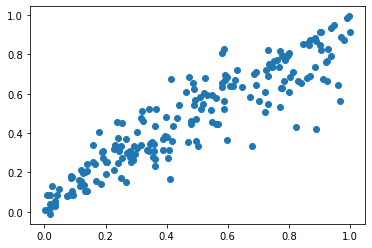

In [74]:
plt.scatter(y_test,p)

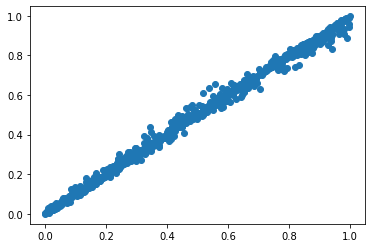

In [75]:
plt.scatter(y_train,q)

In [76]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, p))
r2_test = r2_score(y_test, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.021156862873112463
R2 score of training set is 0.9946458361537519


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.11628005408644809
R2 score of test set is 0.8336094913613532
